In [58]:
import pandas as pd 
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import numpy as np

In [59]:
# Read participant csv file
df_participant = pd.read_csv('participant_data.csv')

# Read eyetrack data
df_eyetrack = pd.read_csv('eyetrack_data.tsv', sep='\t', header=0)

# Remove the columns that are not needed
df_eyetrack = df_eyetrack.drop(columns=['Recording', 'Gender', 'Timeline', 'TOI', 'Interval'])

# Delete all rows for participant "Test Participant"
df_eyetrack = df_eyetrack[df_eyetrack['Participant'] != 'Test Participant']

In [60]:
# Divide df_participant into two dataframes based on the Base Language column
df_participant_java = df_participant[df_participant['Base Language'] == 'Java']

############################################################################# Select only the partipants with "Python Freq" = 1
#df_participant_java = df_participant[df_participant['Python Freq'] == 1]

df_participant_python = df_participant[df_participant['Base Language'] == 'Python']

<Axes: >

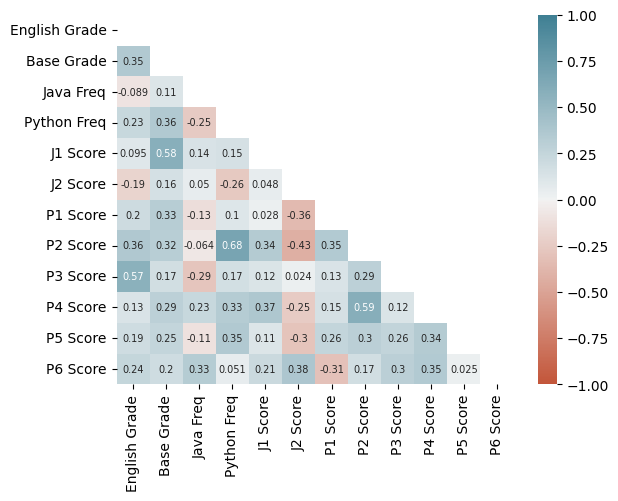

In [61]:
# Compute Pearson correlation coefficients 
corrmat = df_participant_java.corr(numeric_only=True)
mask= np.zeros_like(corrmat)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corrmat,
            vmax=1, vmin=-1,
            annot=True, annot_kws={'fontsize':7},
            mask=mask,
            cmap=sns.diverging_palette(20,220,as_cmap=True))

<Axes: >

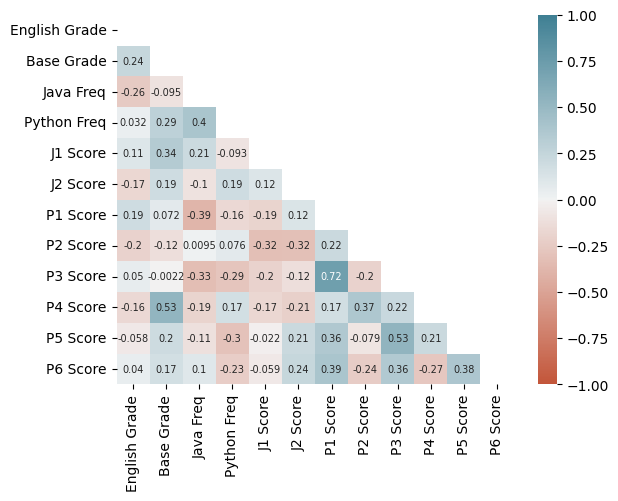

In [62]:
corrmat = df_participant_python.corr(numeric_only=True)
mask= np.zeros_like(corrmat)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corrmat,
            vmax=1, vmin=-1,
            annot=True, annot_kws={'fontsize':7},
            mask=mask,
            cmap=sns.diverging_palette(20,220,as_cmap=True))

In [63]:
# List the metric columns
metrics = ['Total_duration_of_fixations', 
           'Average_duration_of_fixations', 
           'Number_of_fixations', 
           'Time_to_first_fixation', 
           'Duration_of_first_fixation', 
           'Average_pupil_diameter'
           ]

# Pivot the data into a 3-level table, make the index the Participant column
df_eyetrack = df_eyetrack.pivot_table(index='Participant', 
                                columns=['Media','AOI'], 
                                values= metrics)

# Divide df_eyetrack into two dataframes based on whether the partipant's base language is Java or Python
df_eyetrack_java = df_eyetrack.loc[df_participant_java['Participant']]
df_eyetrack_python = df_eyetrack.loc[df_participant_python['Participant']]


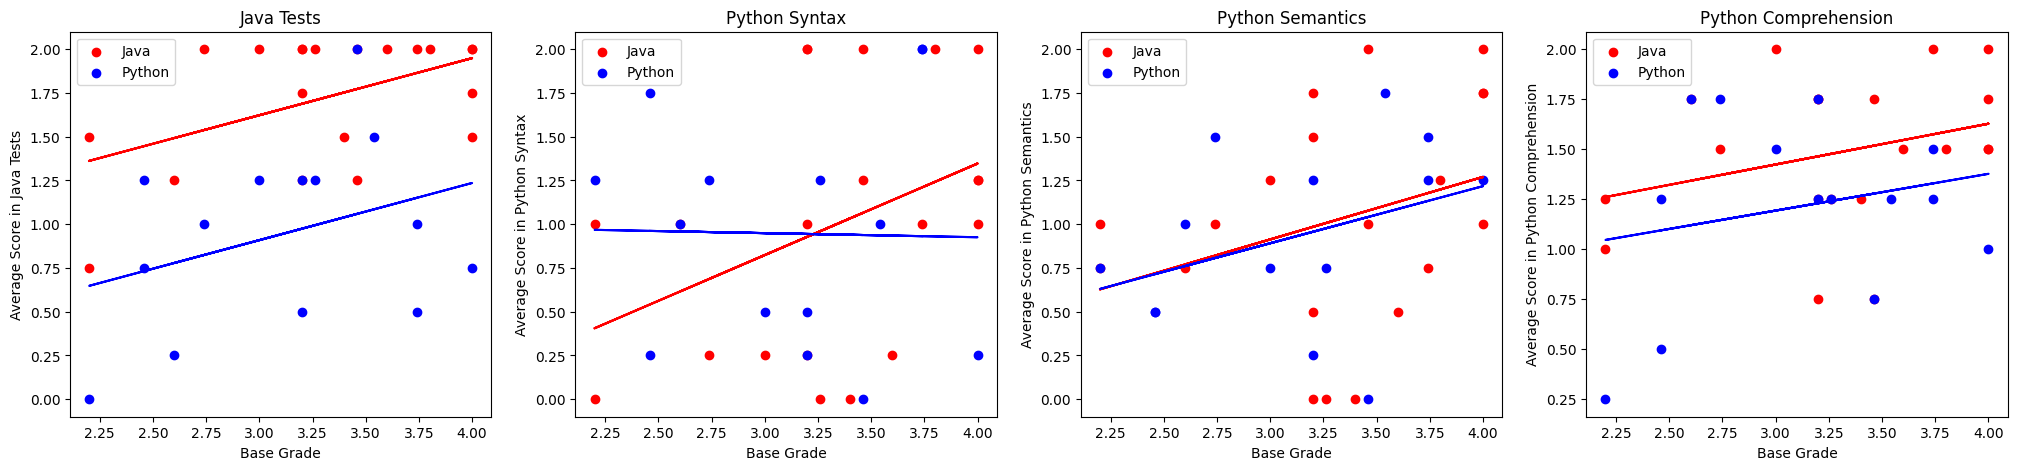

In [76]:
# Plotting graphs for Java/Python participant grades vs their scores
x1 = df_participant_java["Base Grade"]
x2 = df_participant_python["Base Grade"]

scores = ['J1 Score', 'J2 Score']
j_avg_jscores = df_participant_java.loc[:, scores].mean(axis = 1)
p_avg_jscores = df_participant_python.loc[:, scores].mean(axis = 1)

scores = ['P1 Score', 'P2 Score']
j_avg_psyn_scores = df_participant_java.loc[:, scores].mean(axis = 1)
p_avg_psyn_scores = df_participant_python.loc[:, scores].mean(axis = 1)

scores = ['P3 Score', 'P4 Score']
j_avg_psem_scores = df_participant_java.loc[:, scores].mean(axis = 1)
p_avg_psem_scores = df_participant_python.loc[:, scores].mean(axis = 1)

scores = ['P5 Score', 'P6 Score']
j_avg_pcomp_scores = df_participant_java.loc[:, scores].mean(axis = 1)
p_avg_pcomp_scores = df_participant_python.loc[:, scores].mean(axis = 1)

# Create 5 subplots of scatter graphs
fig, axs = plt.subplots(1, 4, figsize=(25, 5))

subplot_params = [
    [j_avg_jscores, p_avg_jscores,'Java Tests', 'Average Score in Java Tests'],
    [j_avg_psyn_scores, p_avg_psyn_scores, 'Python Syntax', 'Average Score in Python Syntax'],
    [j_avg_psem_scores, p_avg_psem_scores, 'Python Semantics', 'Average Score in Python Semantics'],
    [j_avg_pcomp_scores, p_avg_pcomp_scores, 'Python Comprehension', 'Average Score in Python Comprehension']
]

for i in range(len(subplot_params)):
    y1 = subplot_params[i][0]
    y2 = subplot_params[i][1]
    m1, b1 = np.polyfit(x1, y1, 1)
    m2, b2 = np.polyfit(x2, y2, 1)
    axs[i].set_title(subplot_params[i][2])
    axs[i].scatter(x1, y1, color='red')
    axs[i].scatter(x2, y2, color='blue')
    axs[i].plot(x1, m1*x1 + b1, color='red')
    axs[i].plot(x2, m2*x2 + b2, color='blue')
    axs[i].set_xlabel('Base Grade')
    axs[i].set_ylabel(subplot_params[i][3])
    axs[i].legend(['Java', 'Python'])

